# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

70b17dee0232f4d7a21df681d272d59b


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

83

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through the list of cities and perform a request for data on each
citiesdata = []

for city in cities:
#     print(city)
    query_url = url + "&q=" + city
#     print(query_url)
    try:
        weatherdata = requests.get(query_url).json()
#         print(weatherdata)
        name = weatherdata["name"]
        country = weatherdata['sys']["country"]
        date = weatherdata["dt"]
        lat = weatherdata['coord']['lat']
        lng = weatherdata['coord']['lon']
        temp = weatherdata['main']['temp_max']
        humid = weatherdata['main']['humidity']
        cloud = weatherdata['clouds']['all']
        windSpeed = weatherdata['wind']['speed'] 
        citydata = {
            'City': name,
            'Country': country,
            'Date': date,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': temp,
            'Humid': humid,
            'Cloud': cloud,
            'Wind Speed': windSpeed                      
        }
        
        citiesdata.append(citydata)
    except KeyError:
        print(f'City not found. Skipping...')
    
print("Beginning Data Retrival")
print("-------------------------------------")
print(citiesdata)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Beginning Data Retrival
-------------------------------------
[{'City': 'Ponta do Sol', 'Country': 'PT', 'Date': 1604176941, 'Lat': 32.67, 'Lng': -17.1, 'Max Temp': 72, 'Humid': 68, 'Cloud': 20, 'Wind Speed': 8.05}, {'City': 'Cherskiy', 'Country': 'RU', 'Date': 1604176694, 'Lat': 68.75, 'Lng': 161.3, 'Max Temp': 9.63, 'Humid': 89, 'Cloud': 97, 'Wind Speed': 3.85}, {'City': 'Phonhong', 'Country': 'LA', 'Date': 1604177123, 'Lat': 18.5, 'Lng': 102.42, 'Max Temp': 71.83, 'Humid': 91, 'Cloud': 1, 'Wind Speed': 1.74}, {'City': 'Arraial do Cabo', 'Country': 'BR', 'Date': 1604176945, 'Lat': -22.97, 'Lng': -42.03, 'Max Temp': 71.6, 'Humid': 88, 'Cloud': 75, 'Wind Speed': 10.29}, {'City': 'Farnes', 'Country': 'NO', 'Date

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherDF = pd.DataFrame(citiesdata)
weatherDF.to_csv("../output_data/cities.csv")
weatherDF

,City,Country,Date,Lat,Lng,Max Temp,Humid,Cloud,Wind Speed
0,Ponta do Sol,PT,1604176941,32.67,-17.10,72.00,68,20,8.05
1,Cherskiy,RU,1604176694,68.75,161.30,9.63,89,97,3.85
2,Phonhong,LA,1604177123,18.50,102.42,71.83,91,1,1.74
3,Arraial do Cabo,BR,1604176945,-22.97,-42.03,71.60,88,75,10.29
4,Farnes,NO,1604177123,61.32,7.80,35.73,84,89,8.97
...,...,...,...,...,...,...,...,...,...
68,Vila Velha,BR,1604176674,-20.33,-40.29,71.60,94,90,8.05
69,Manta,EC,1604177132,-0.95,-80.73,77.00,78,75,11.41
70,Hermanus,ZA,1604176937,-34.42,19.23,57.00,77,0,7.00
71,Mayo,US,1604177132,38.89,-76.51,48.99,61,90,4.70


In [7]:
weatherDF.describe()

,Date,Lat,Lng,Max Temp,Humid,Cloud,Wind Speed
count,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1.604177e+09,16.942192,10.147123,58.855342,73.356164,50.095890,9.058356
std,1.501375e+02,36.435182,104.122194,22.441744,17.394419,38.240164,6.038052
min,1.604177e+09,-54.800000,-159.780000,-5.550000,24.000000,0.000000,1.740000
25%,1.604177e+09,-13.880000,-76.510000,44.010000,65.000000,18.000000,4.700000
50%,1.604177e+09,22.790000,7.800000,62.740000,76.000000,40.000000,8.050000
75%,1.604177e+09,42.600000,121.440000,77.000000,88.000000,90.000000,11.410000
max,1.604177e+09,77.480000,168.860000,91.400000,100.000000,100.000000,32.210000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
dirtyData = weatherDF[weatherDF["Humid"]> 100].index
dirtyData

Int64Index([], dtype='int64')

In [9]:
city_data_clean = weatherDF.drop(dirtyData, inplace=False)
city_data_clean

,City,Country,Date,Lat,Lng,Max Temp,Humid,Cloud,Wind Speed
0,Ponta do Sol,PT,1604176941,32.67,-17.10,72.00,68,20,8.05
1,Cherskiy,RU,1604176694,68.75,161.30,9.63,89,97,3.85
2,Phonhong,LA,1604177123,18.50,102.42,71.83,91,1,1.74
3,Arraial do Cabo,BR,1604176945,-22.97,-42.03,71.60,88,75,10.29
4,Farnes,NO,1604177123,61.32,7.80,35.73,84,89,8.97
...,...,...,...,...,...,...,...,...,...
68,Vila Velha,BR,1604176674,-20.33,-40.29,71.60,94,90,8.05
69,Manta,EC,1604177132,-0.95,-80.73,77.00,78,75,11.41
70,Hermanus,ZA,1604176937,-34.42,19.23,57.00,77,0,7.00
71,Mayo,US,1604177132,38.89,-76.51,48.99,61,90,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
lats = city_data_clean["Lat"]
MaxTemps = city_data_clean["Max Temp"]
Humidity = city_data_clean["Humid"]
Cloudiness = city_data_clean["Cloud"]
WindSpeed = city_data_clean["Wind Speed"]

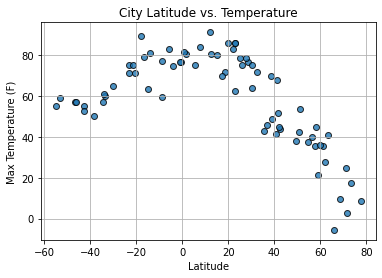

In [11]:
plt.scatter(lats, MaxTemps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

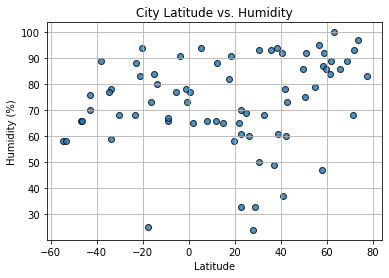

In [12]:
plt.scatter(lats, Humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/LatvsHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

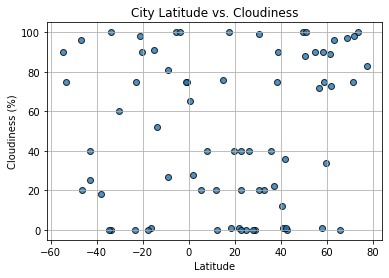

In [13]:
plt.scatter(lats, Cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/LatvsCloud.png")
plt.show()


## Latitude vs. Wind Speed Plot

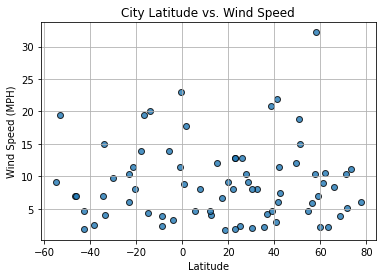

In [14]:
plt.scatter(lats, WindSpeed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.savefig("../output_data/LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [15]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

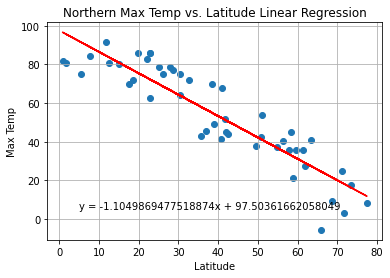

In [16]:
x_axis = round(northernHemisphere["Lat"], 2)
y_axis = round(northernHemisphere["Max Temp"], 2)
title = "Northern Max Temp vs. Latitude Linear Regression"
coord = (5, 5)
yLabel = "Max Temp"
path = "../output_data/TempvsLatLinNorth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

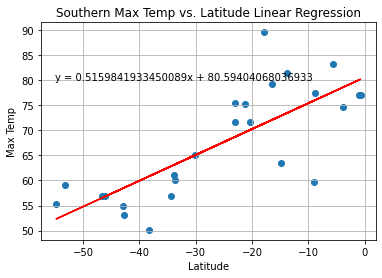

In [17]:
x_axis = round(southernHemisphere["Lat"], 2)
y_axis = round(southernHemisphere["Max Temp"], 2)
title = "Southern Max Temp vs. Latitude Linear Regression"
coord = (-55, 80)
yLabel = "Max Temp"
path = "../output_data/TempvsLatLinSouth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

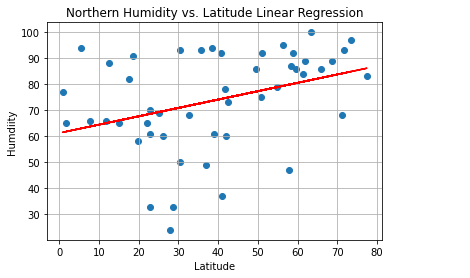

In [19]:
x_axis = round(northernHemisphere["Lat"], 2)
y_axis = round(northernHemisphere["Humid"], 2)
title = "Northern Humidity vs. Latitude Linear Regression"
coord = (40, 10)
yLabel = "Humdiity"
path = "../output_data/HumidvsLatLinNorth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

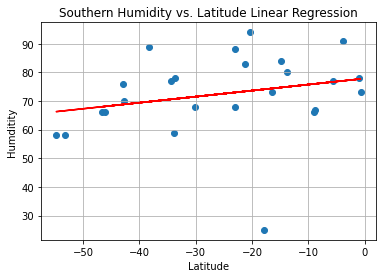

In [21]:
x_axis = round(southernHemisphere["Lat"], 2)
y_axis = round(southernHemisphere["Humid"], 2)
title = "Southern Humidity vs. Latitude Linear Regression"
coord = (-50, 20)
yLabel = "Humditity"
path = "../output_data/HumidvsLatLinSouth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [22]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

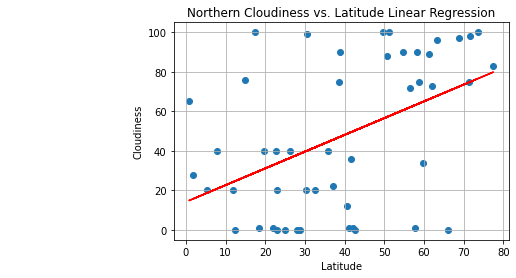

In [23]:
x_axis = round(northernHemisphere["Lat"], 2)
y_axis = round(northernHemisphere["Cloud"], 2)
title = "Northern Cloudiness vs. Latitude Linear Regression"
coord = (-45, 10)
yLabel = "Cloudiness"
path = "../output_data/CloudvsLatLinNort.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

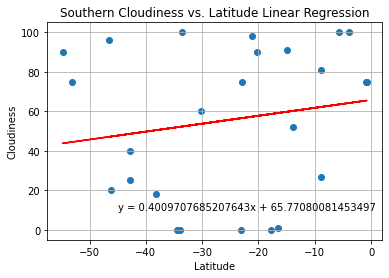

In [25]:
x_axis = round(southernHemisphere["Lat"], 2)
y_axis = round(southernHemisphere["Cloud"], 2)
title = "Southern Cloudiness vs. Latitude Linear Regression"
coord = (-45, 10)
yLabel = "Cloudiness"
path = "../output_data/CloudvsLatLinSouth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

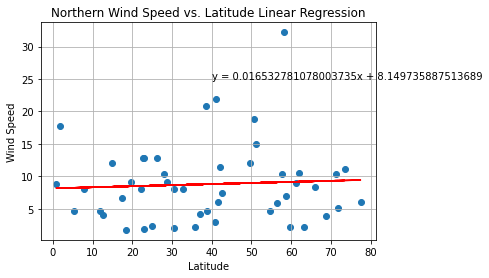

In [27]:
x_axis = round(northernHemisphere["Lat"], 2)
y_axis = round(northernHemisphere["Wind Speed"], 2)
title = "Northern Wind Speed vs. Latitude Linear Regression"
coord = (40, 25)
yLabel = "Wind Speed"
path = "../output_data/WindvsLatLinNorth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
def plotLinearReg(x_axis, y_axis, coord, title, yLabel, path):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regressValues = intercept + slope*x_axis
    lineEquation = "y = " + str(slope) + "x + " + str(intercept)
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regressValues, "r-")
    plt.annotate(lineEquation, coord)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.savefig(path)
    plt.show()
#     print("This is a function")

northernHemisphere = city_data_clean.loc[city_data_clean["Lat"]>=0]
southernHemisphere = city_data_clean.loc[city_data_clean["Lat"]<0]

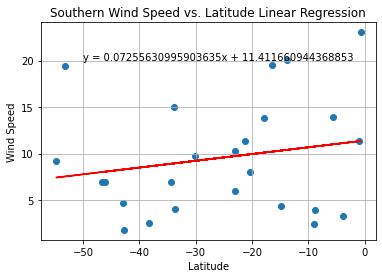

In [29]:
x_axis = round(southernHemisphere["Lat"], 2)
y_axis = round(southernHemisphere["Wind Speed"], 2)
title = "Southern Wind Speed vs. Latitude Linear Regression"
coord = (-50, 20)
yLabel = "Wind Speed"
path = "../output_data/WindvsLatLinSouth.png"

plotLinearReg(x_axis, y_axis, coord, title, yLabel, path)